# Human Resources Data Analytics

#### In this project we would analyze human resources data from a company named 10degree. They want to know everything that can be known, especially the main reason why some of their employees decided to leave. That is our main goal in this project. So, that is our introduction, hope it can give your general picture about what we want to do in this particular project, and without further do, lets jump into the water.

### First of all, lets import all the needed libraries fellas, shall we?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import seaborn as sns

import pandas.util.testing as tm
import warnings
warnings.filterwarnings("ignore")

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Second of all, load the dataset

In [2]:
df = pd.read_csv('C:/Users/ASUS/Downloads/hrd.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Clean it before analyzing it! That's a must

In [3]:
# Cleaning Missing Value

missing_value_before = df.isna().sum()
print('Missing value before:', missing_value_before)

df = df.dropna(how='all')
missing_value_after = df.isna().sum()
print('Missing value after:', missing_value_after)

Missing value before: satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64
Missing value after: satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [4]:
# Unfortunately, we cannot perform drop duplicates because there is no id attribute in the dataset, which can differentiate each
# row. But if you want to perform it, uncomment below code.

# Cleaning Duplicates

# duplicates_before = df.duplicated().sum()
# print('Duplicates before:', duplicates_before)

# df = df.drop_duplicates()
# duplicates_after = df.duplicated().sum()
# print('Duplicates after:', duplicates_after)

### Now, lets jump into the real field, ANALYSIS

### First, we have to know "The Surface" of our data

In [5]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Is it just me who notice that "sales" column should be "position" column? 

In [6]:
df = df.rename(columns={"sales": "position"})
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,position,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### After cleaning our data, it's time for visualization to take over!!!

### Hunting down outliars!!!

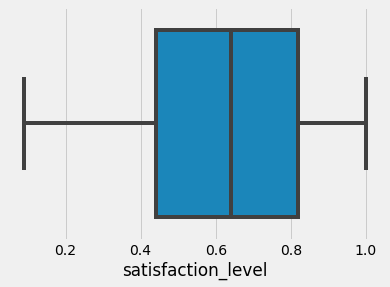

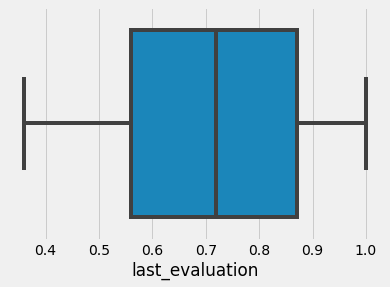

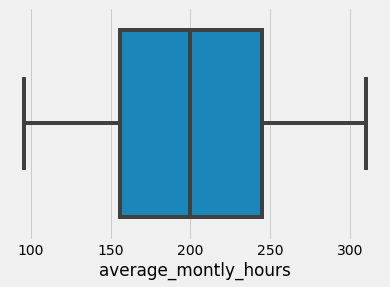

In [7]:
### We use boxplot to detect outliers. Every value that is far away from minimum or maximum range will be considered 
### as outliers.
num_cols = [i for i in df.columns if df[i].nunique() > 10]

for i in num_cols:
    
    sns.boxplot(df[i])
    plt.show()

### Before we begin our "Holy Journey" to search the answer of the main question, lets see how all features in our data look like

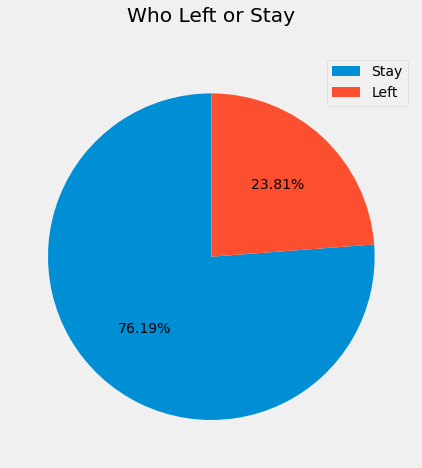

In [8]:
value = df['left'].value_counts().values.tolist()
label = df['left'].replace({0:'Stay', 1:'Left'}).value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Who Left or Stay', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

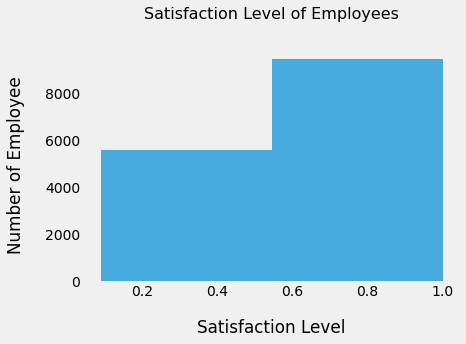

In [9]:
plt.hist(df['satisfaction_level'], alpha=0.7, bins=2) ### Change the bins to see more real histogram
plt.title('Satisfaction Level of Employees', fontsize=16, y=1.1)
plt.xlabel('Satisfaction Level', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()

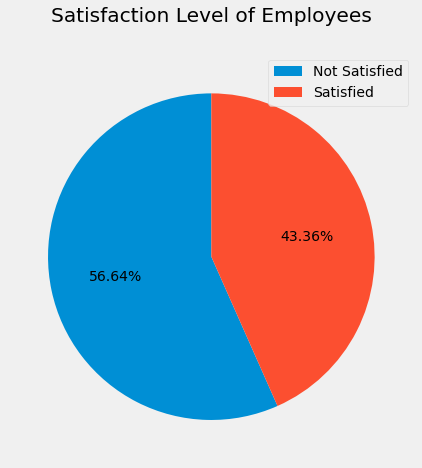

In [10]:
satisfied     = df['satisfaction_level'] >= 0.7 # If we consider 0.7 is a good satisfaction level. But off course you can change it
satisfied     = satisfied.replace({True:'Satisfied', False:'Not Satisfied'})
satisfied     = pd.DataFrame(satisfied)

value = satisfied['satisfaction_level'].value_counts().values.tolist()
label = satisfied['satisfaction_level'].value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Satisfaction Level of Employees', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

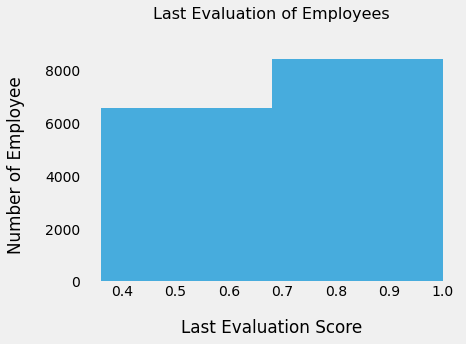

In [11]:
df['last_evaluation'].plot.hist(alpha=0.7, bins=2)
plt.title('Last Evaluation of Employees', fontsize=16, y=1.1)
plt.xlabel('Last Evaluation Score', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()

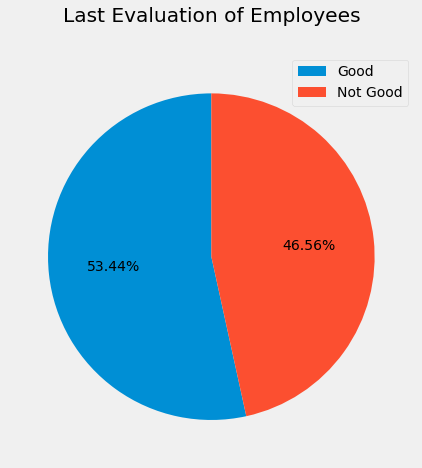

In [12]:
satisfied     = df['last_evaluation'] >= 0.7
satisfied     = satisfied.replace({True:'Good', False:'Not Good'})
satisfied     = pd.DataFrame(satisfied)

value = satisfied['last_evaluation'].value_counts().values.tolist()
label = satisfied['last_evaluation'].value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Last Evaluation of Employees', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

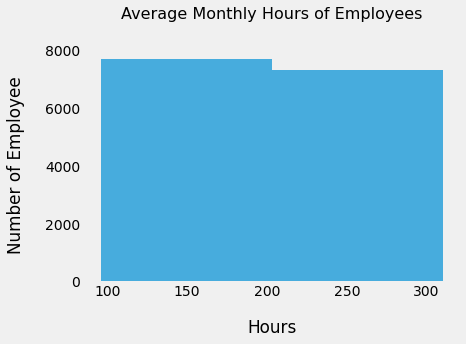

In [13]:
df['average_montly_hours'].plot.hist(alpha=0.7, bins=2)
plt.title('Average Monthly Hours of Employees', fontsize=16, y=1.1)
plt.xlabel('Hours', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


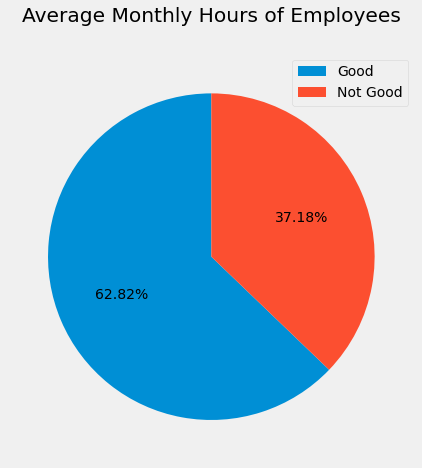

In [14]:
satisfied     = df['average_montly_hours'] >= 176
satisfied     = satisfied.replace({True:'Good', False:'Not Good'})
satisfied     = pd.DataFrame(satisfied)

value = satisfied['average_montly_hours'].value_counts().values.tolist()
label = satisfied['average_montly_hours'].value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Average Monthly Hours of Employees', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

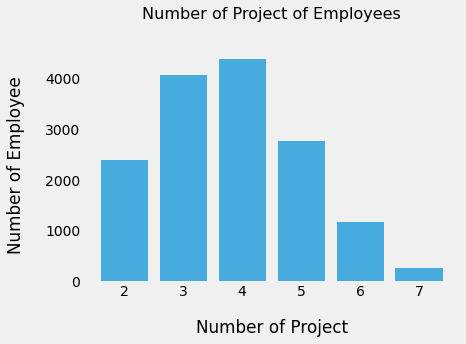

In [15]:
value_left = df['number_project'].value_counts().values.tolist()
label_left = df['number_project'].value_counts().keys().tolist()

plt.bar(label_left, value_left, alpha=0.7)
plt.title('Number of Project of Employees', fontsize=16, y=1.1)
plt.xlabel('Number of Project', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


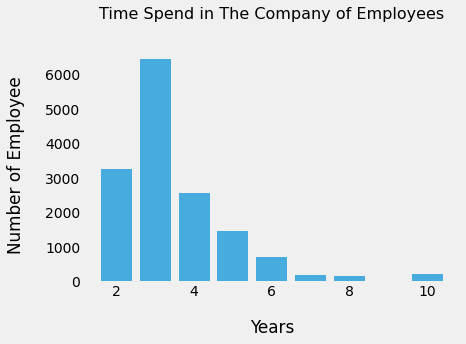

In [16]:
value_left = df['time_spend_company'].value_counts().values.tolist()
label_left = df['time_spend_company'].value_counts().keys().tolist()

plt.bar(label_left, value_left, alpha=0.7)
plt.title('Time Spend in The Company of Employees', fontsize=16, y=1.1)
plt.xlabel('Years', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


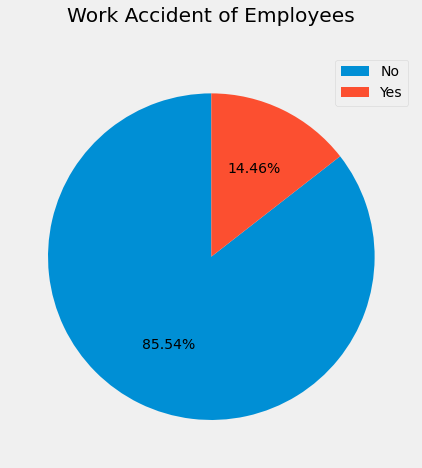

In [17]:
value = df['Work_accident'].value_counts().values.tolist()
label = df['Work_accident'].replace({0:'No', 1:'Yes'}).value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Work Accident of Employees', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

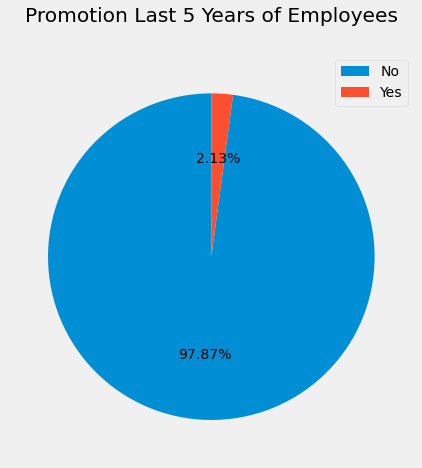

In [18]:
value = df['promotion_last_5years'].value_counts().values.tolist()
label = df['Work_accident'].replace({0:'No', 1:'Yes'}).value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Promotion Last 5 Years of Employees', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

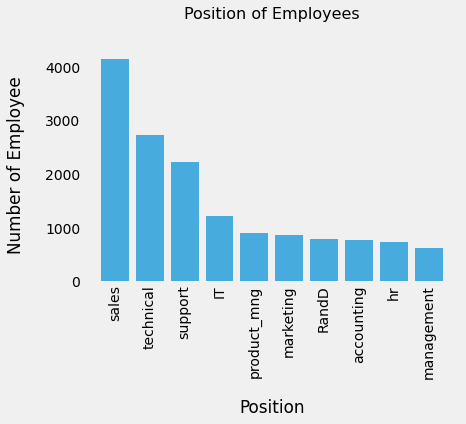

In [19]:

value_left = df['position'].value_counts().values.tolist()
label_left = df['position'].value_counts().keys().tolist()

plt.bar(label_left, value_left, alpha=0.7)
plt.title('Position of Employees', fontsize=16, y=1.1)
plt.xlabel('Position', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.xticks(rotation=90)

plt.show()

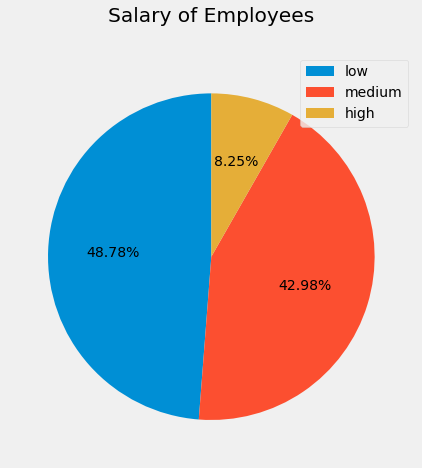

In [20]:
value = df['salary'].value_counts().values.tolist()
label = df['salary'].value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Salary of Employees', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

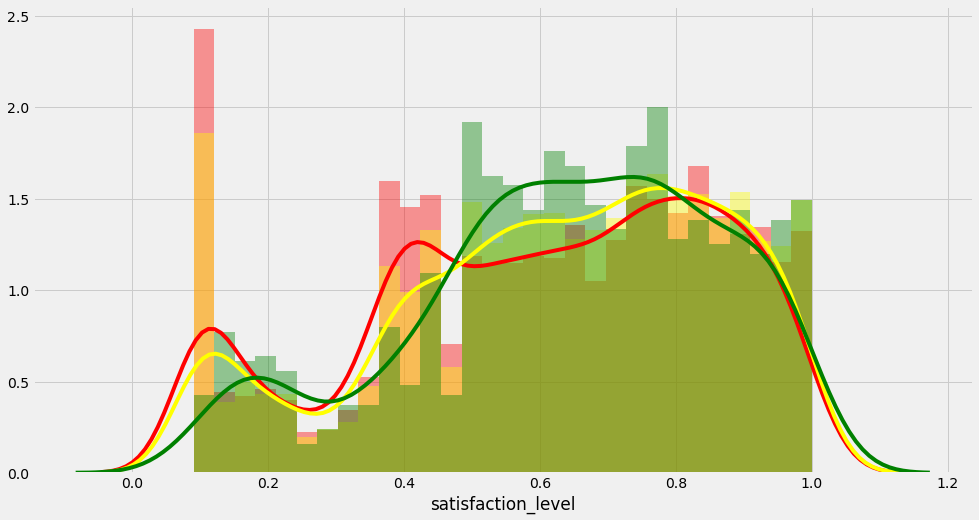

In [21]:
low_salary    = df[df.salary == 'low']
medium_salary = df[df.salary == 'medium']
high_salary   = df[df.salary == 'high']

plt.figure(figsize=(15, 8))
sns.distplot(low_salary.satisfaction_level, bins=30, color='red')
sns.distplot(medium_salary.satisfaction_level, bins=30, color='yellow')
sns.distplot(high_salary.satisfaction_level, bins=30, color='green')


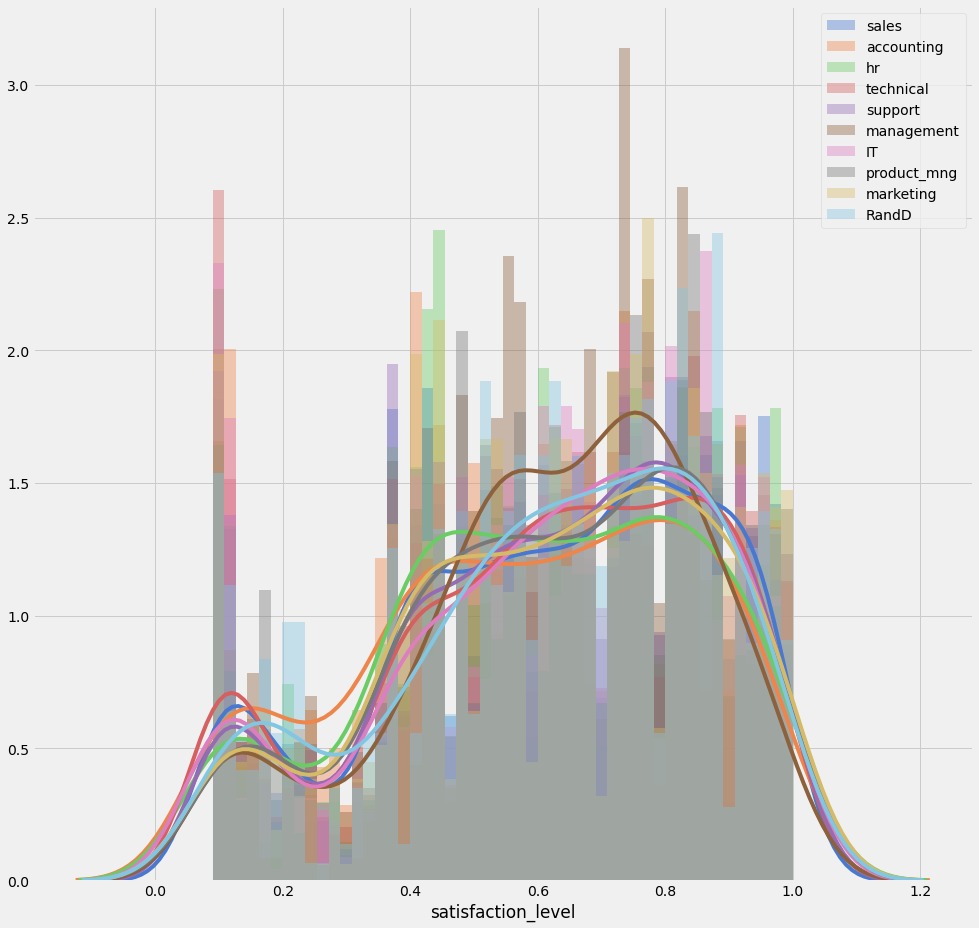

In [22]:
plt.figure(figsize=(15,15))

position_unique = df.position.unique()

with sns.color_palette("muted", 10):
    for i in position_unique:
        i_position = df[df.position == i]
        sns.distplot(i_position.satisfaction_level, bins=50)
        plt.legend(position_unique)


### How was the relationship in the neighborhood ?

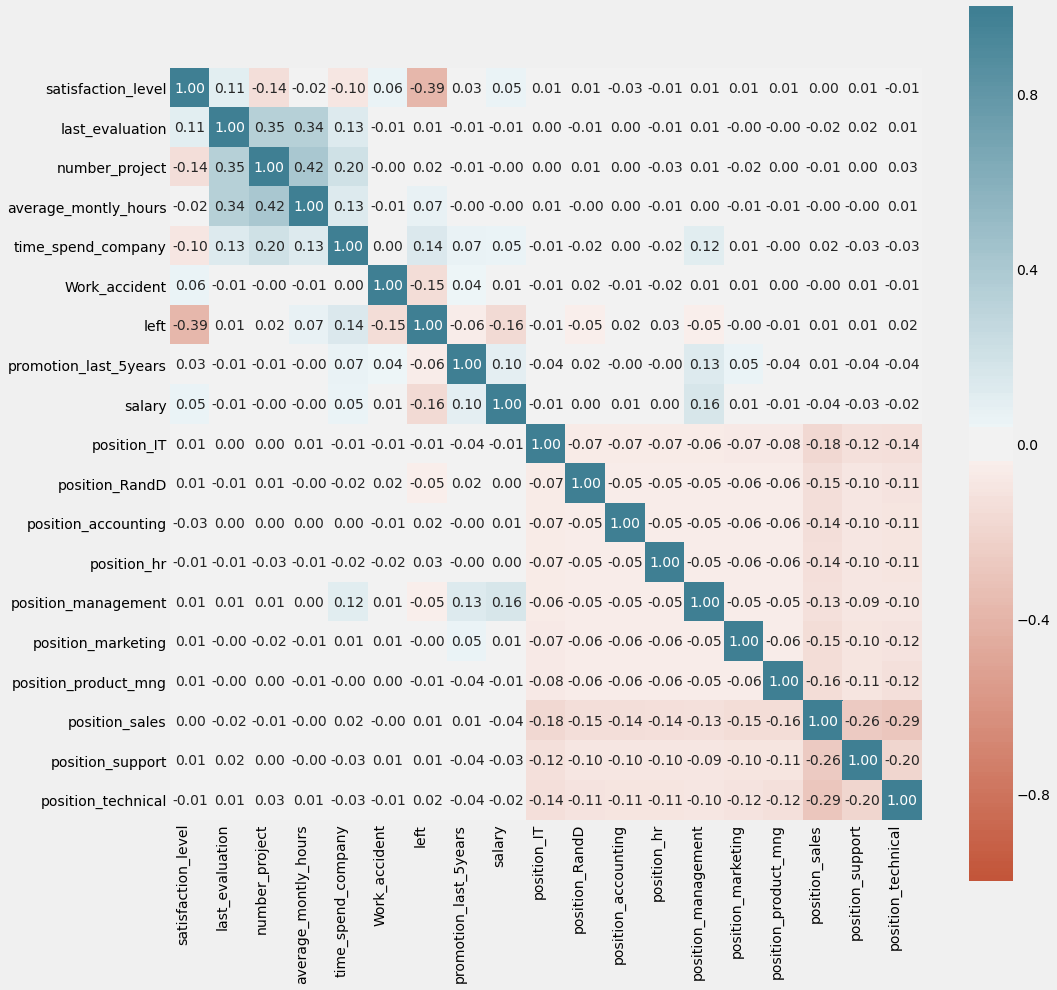

In [23]:
plt.figure(figsize=(15,15))

df_corr = df.copy()
df_corr['salary'] = df_corr['salary'].replace({'low':1, 'medium':2, 'high':3})

df_corr = pd.get_dummies(df_corr)

corr = df_corr.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt= '.2f')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')

plt.show()


In [24]:
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,position_IT,position_RandD,position_accounting,position_hr,position_management,position_marketing,position_product_mng,position_sales,position_support,position_technical
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022,0.006373,0.006615,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002,0.001269,-0.005471,0.002193,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803,0.003287,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242,0.006967,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715,-0.006053,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247,-0.009293,0.017167,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898,-0.010925,-0.046596,0.015201,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119,-0.038942,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000,-0.010959,0.002800,0.012759,0.004599,0.156665,0.011599,-0.007669,-0.035599,-0.029888,-0.018630
position_IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.010925,-0.038942,-0.010959,1.000000,-0.070240,-0.069293,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484


<function matplotlib.pyplot.show(*args, **kw)>

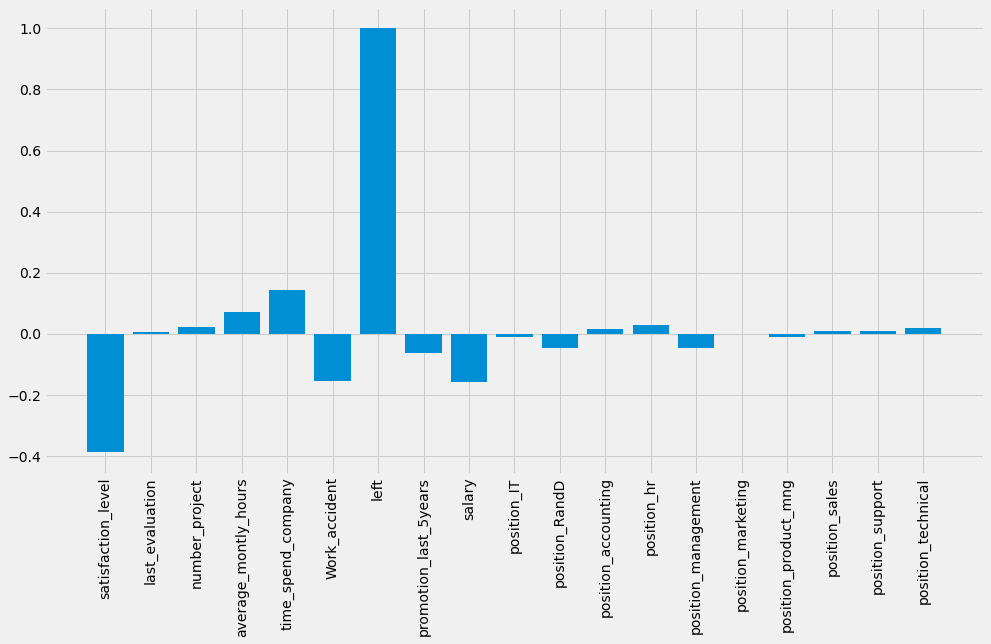

In [25]:
columns = df_corr.drop(columns=['left']).columns
corr1 = corr.drop(columns, axis=1)

plt.figure(figsize=(15,8))
plt.bar(x=corr1.index, height=corr1['left'])
plt.xticks(rotation=90)
plt.show

### How to read colleration matrix above?
#### 1. Negative value means that the relationship is opposite
#### 2. Positive value means that the relationship is linear
#### 3. Null value means that there is no relationship
#### So, from above plot, we can say that the main reason why employees left the company is because they're not satisfy working in the company.
#### To dive this matter deeper, we should divide the dataset into left group (employees who left) and stay group (employees who stay) and analyze it

In [26]:
df_left     = df[df['left'] == 1].drop('left', axis=1)
df_not_left = df[df['left'] == 0].drop('left', axis=1)


### Left Group

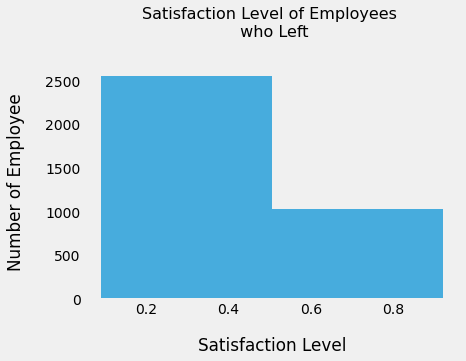

In [27]:
plt.hist(df_left['satisfaction_level'], alpha=0.7, bins=2)
plt.title('Satisfaction Level of Employees \n who Left', fontsize=16, y=1.1)
plt.xlabel('Satisfaction Level', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()

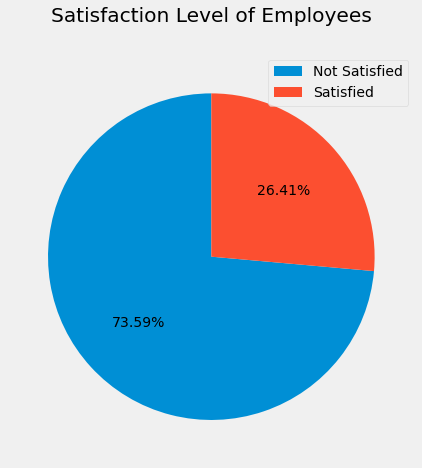

In [28]:
satisfied     = df_left['satisfaction_level'] >= 0.7 # If we consider 0.7 is a good satisfaction level. But off course you can change it
satisfied     = satisfied.replace({True:'Satisfied', False:'Not Satisfied'})
satisfied     = pd.DataFrame(satisfied)

value = satisfied['satisfaction_level'].value_counts().values.tolist()
label = satisfied['satisfaction_level'].value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Satisfaction Level of Employees', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

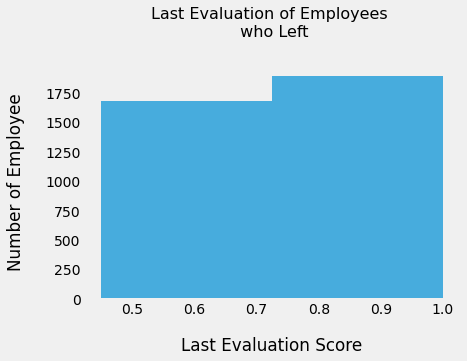

In [29]:
df_left['last_evaluation'].plot.hist(alpha=0.7, bins=2)
plt.title('Last Evaluation of Employees \n who Left', fontsize=16, y=1.1)
plt.xlabel('Last Evaluation Score', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


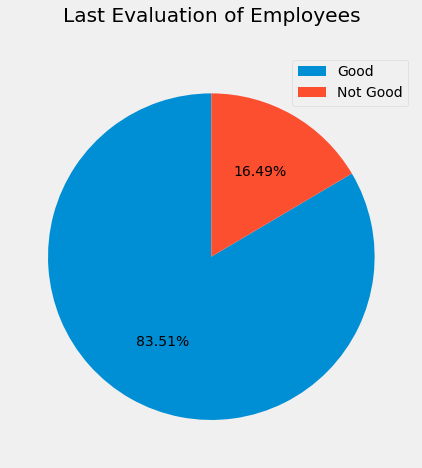

In [30]:
satisfied     = df_left['last_evaluation'] >= 0.5 
satisfied     = satisfied.replace({True:'Good', False:'Not Good'})
satisfied     = pd.DataFrame(satisfied)

value = satisfied['last_evaluation'].value_counts().values.tolist()
label = satisfied['last_evaluation'].value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Last Evaluation of Employees', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

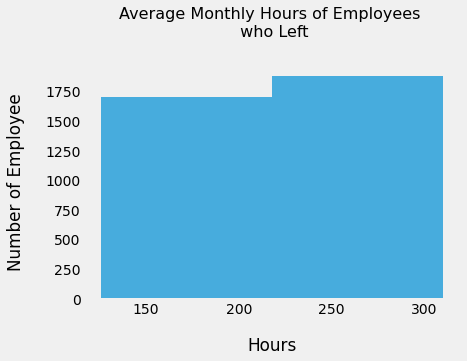

In [31]:
df_left['average_montly_hours'].plot.hist(alpha=0.7, bins=2)
plt.title('Average Monthly Hours of Employees \n who Left', fontsize=16, y=1.1)
plt.xlabel('Hours', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


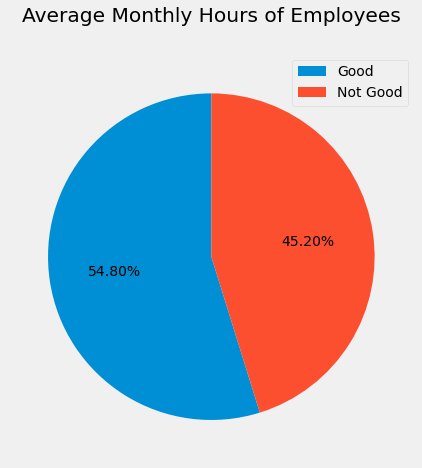

In [32]:
satisfied     = df_left['average_montly_hours'] >= 176 
satisfied     = satisfied.replace({True:'Good', False:'Not Good'})
satisfied     = pd.DataFrame(satisfied)

value = satisfied['average_montly_hours'].value_counts().values.tolist()
label = satisfied['average_montly_hours'].value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Average Monthly Hours of Employees', y=1.06)
plt.legend(label, loc='upper right')
plt.show()


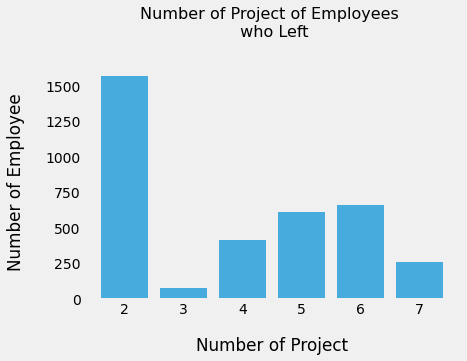

In [33]:
value_left = df_left['number_project'].value_counts().values.tolist()
label_left = df_left['number_project'].value_counts().keys().tolist()

plt.bar(label_left, value_left, alpha=0.7)
plt.title('Number of Project of Employees \n who Left', fontsize=16, y=1.1)
plt.xlabel('Number of Project', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


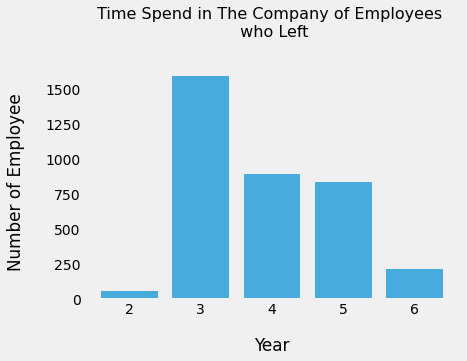

In [34]:
value_left = df_left['time_spend_company'].value_counts().values.tolist()
label_left = df_left['time_spend_company'].value_counts().keys().tolist()

plt.bar(label_left, value_left, alpha=0.7)
plt.title('Time Spend in The Company of Employees \n who Left', fontsize=16, y=1.1)
plt.xlabel('Year', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


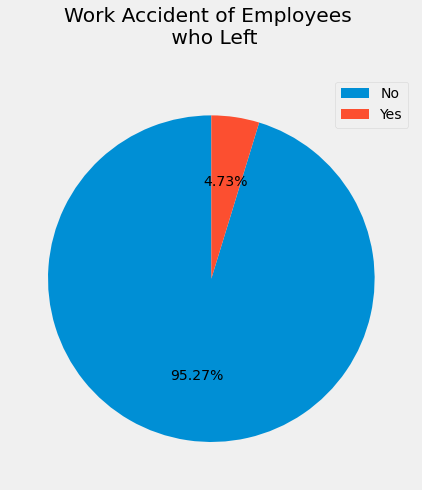

In [35]:
value = df_left['Work_accident'].value_counts().values.tolist()
label = df_left['Work_accident'].replace({0:'No', 1:'Yes'}).value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Work Accident of Employees \n who Left', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

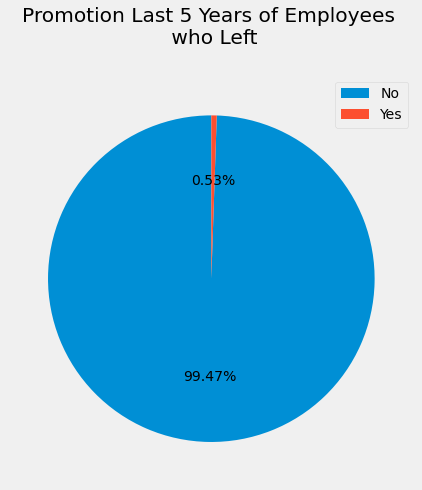

In [36]:
value = df_left['promotion_last_5years'].value_counts().values.tolist()
label = df_left['Work_accident'].replace({0:'No', 1:'Yes'}).value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Promotion Last 5 Years of Employees \n who Left', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

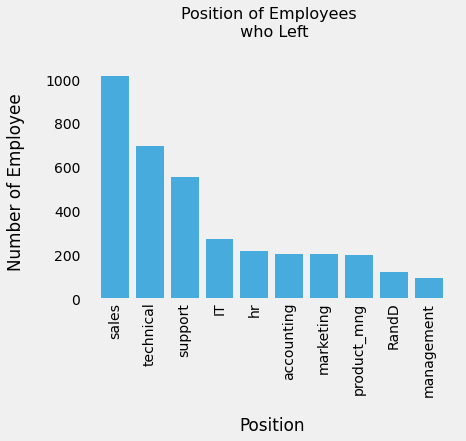

In [37]:

value_left = df_left['position'].value_counts().values.tolist()
label_left = df_left['position'].value_counts().keys().tolist()

plt.bar(label_left, value_left, alpha=0.7)
plt.title('Position of Employees \n who Left', fontsize=16, y=1.1)
plt.xlabel('Position', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.xticks(rotation=90)

plt.show()

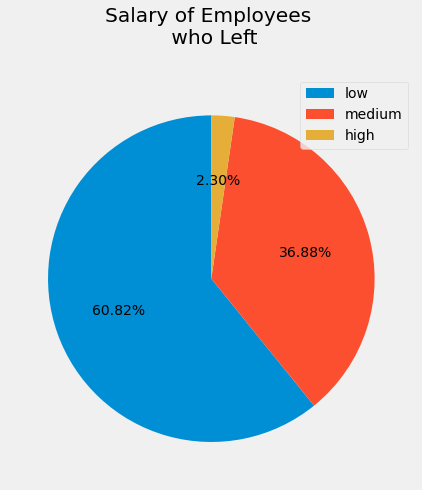

In [38]:
value = df_left['salary'].value_counts().values.tolist()
label = df_left['salary'].value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Salary of Employees \n who Left', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

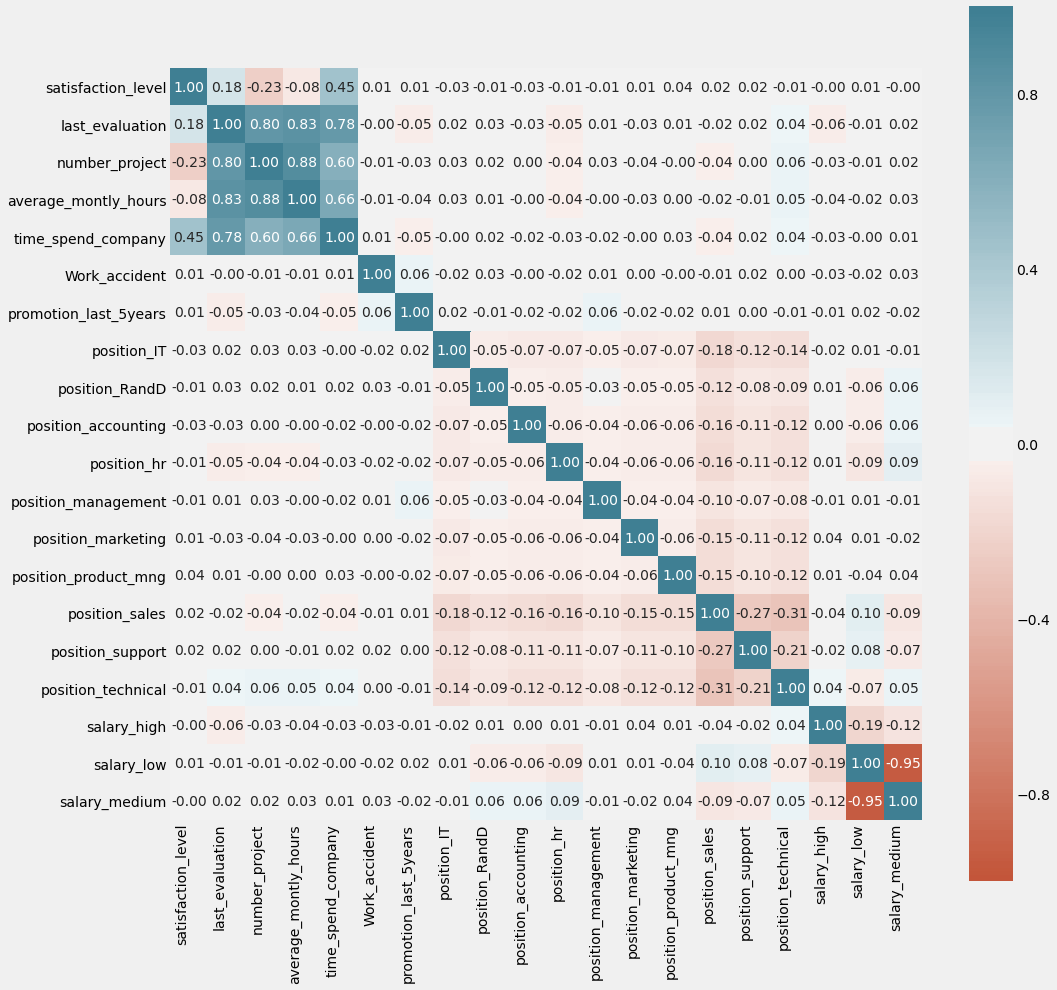

In [39]:

plt.figure(figsize=(15,15))

df_corr = pd.get_dummies(df_left)

corr = df_corr.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt= '.2f')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')

plt.show()


In [40]:
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,position_IT,position_RandD,position_accounting,position_hr,position_management,position_marketing,position_product_mng,position_sales,position_support,position_technical,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.182295,-0.227113,-0.084117,0.446440,0.005864,0.005516,-0.030777,-0.005172,-0.034978,-0.006429,-0.010565,0.012145,0.038072,0.018051,0.017561,-0.014132,-0.003245,0.005428,-0.004485
last_evaluation,0.182295,1.000000,0.804155,0.830336,0.783873,-0.001875,-0.047992,0.017358,0.025829,-0.029395,-0.049165,0.007478,-0.032411,0.010362,-0.021889,0.019974,0.039915,-0.057467,-0.007055,0.024978
number_project,-0.227113,0.804155,1.000000,0.875194,0.601989,-0.008401,-0.032301,0.026927,0.017440,0.002308,-0.043992,0.025561,-0.037033,-0.000935,-0.041158,0.002209,0.055856,-0.034093,-0.013302,0.024042
average_montly_hours,-0.084117,0.830336,0.875194,1.000000,0.664011,-0.009048,-0.035475,0.030234,0.010883,-0.001568,-0.041826,-0.000411,-0.025793,0.001460,-0.024469,-0.012500,0.054437,-0.035879,-0.016045,0.027372
time_spend_company,0.446440,0.783873,0.601989,0.664011,1.000000,0.005222,-0.045888,-0.004621,0.023659,-0.020745,-0.031851,-0.019563,-0.004863,0.028104,-0.041152,0.024937,0.041975,-0.030358,-0.002212,0.011662
Work_accident,0.005864,-0.001875,-0.008401,-0.009048,0.005222,1.000000,0.056214,-0.019456,0.031151,-0.003719,-0.017603,0.005803,0.002238,-0.002135,-0.005815,0.017233,0.000047,-0.034169,-0.021050,0.031905
promotion_last_5years,0.005516,-0.047992,-0.032301,-0.035475,-0.045888,0.056214,1.000000,0.022418,-0.013697,-0.018003,-0.018512,0.061453,-0.017956,-0.017720,0.013700,0.000500,-0.006881,-0.011212,0.019269,-0.016015
position_IT,-0.030777,0.017358,0.026927,0.030234,-0.004621,-0.019456,0.022418,1.000000,-0.053881,-0.070819,-0.072822,-0.046525,-0.070635,-0.069708,-0.181180,-0.123420,-0.141687,-0.015964,0.012851,-0.008046
position_RandD,-0.005172,0.025829,0.017440,0.010883,0.023659,0.031151,-0.013697,-0.053881,1.000000,-0.046097,-0.047401,-0.030284,-0.045977,-0.045374,-0.117933,-0.080337,-0.092227,0.012622,-0.058962,0.055736
position_accounting,-0.034978,-0.029395,0.002308,-0.001568,-0.020745,-0.003719,-0.018003,-0.070819,-0.046097,1.000000,-0.062302,-0.039804,-0.060430,-0.059637,-0.155006,-0.105590,-0.121218,0.002542,-0.061992,0.061930


### Correlation Matrix between satisfaction level and other features in Left Group

<function matplotlib.pyplot.show(*args, **kw)>

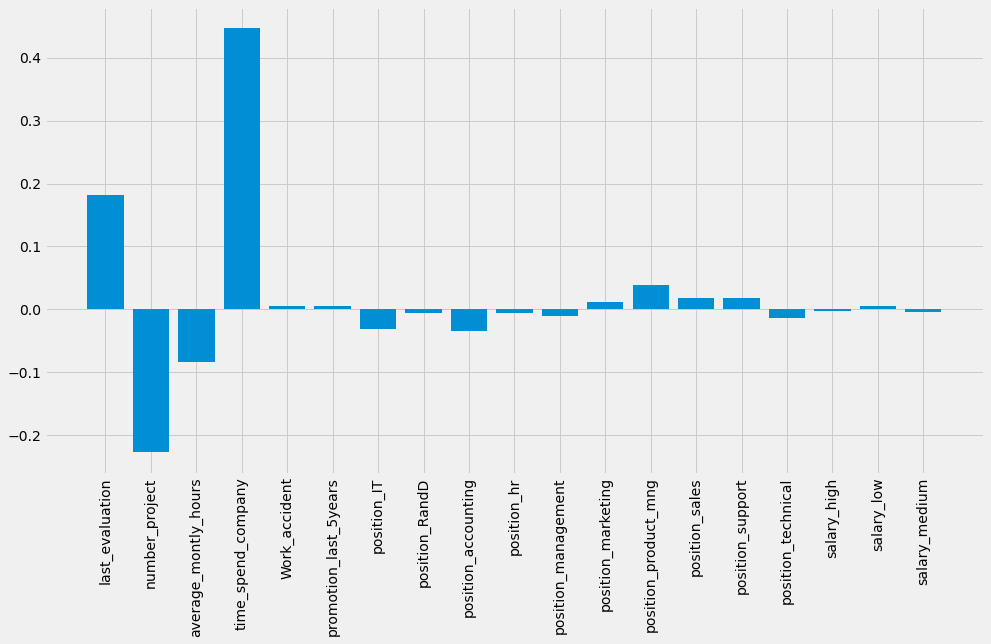

In [41]:
columns = corr.columns[1:]
corr = corr.drop(columns=columns, index=['satisfaction_level'])

plt.figure(figsize=(15,8))
plt.bar(x=corr.index, height=corr['satisfaction_level'])
plt.xticks(rotation=90)
plt.show

### Satisfaction Level by Salary in Left Group

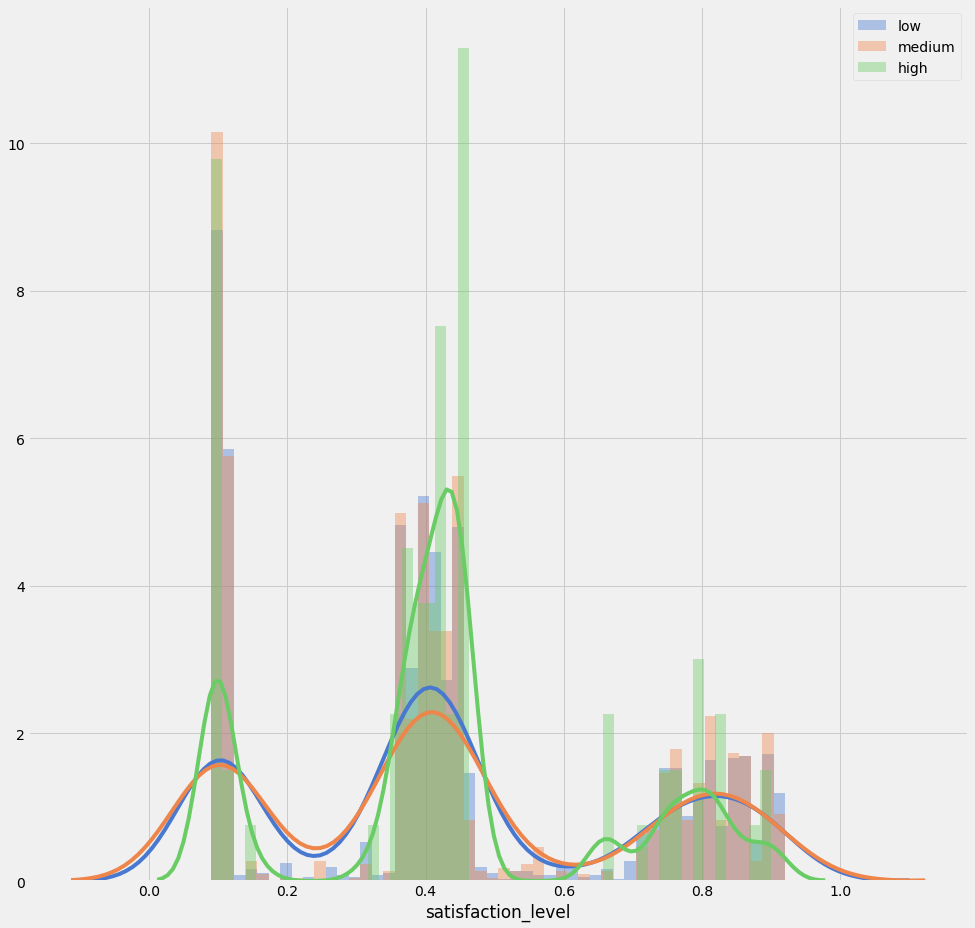

In [42]:
plt.figure(figsize=(15,15))

salary_unique = df_left.salary.unique()

with sns.color_palette("muted", 10):
    for i in salary_unique:
        i_salary = df_left[df_left.salary == i]
        sns.distplot(i_salary.satisfaction_level, bins=50)
        plt.legend(salary_unique)


### Satisfaction Level by Position in Left Group

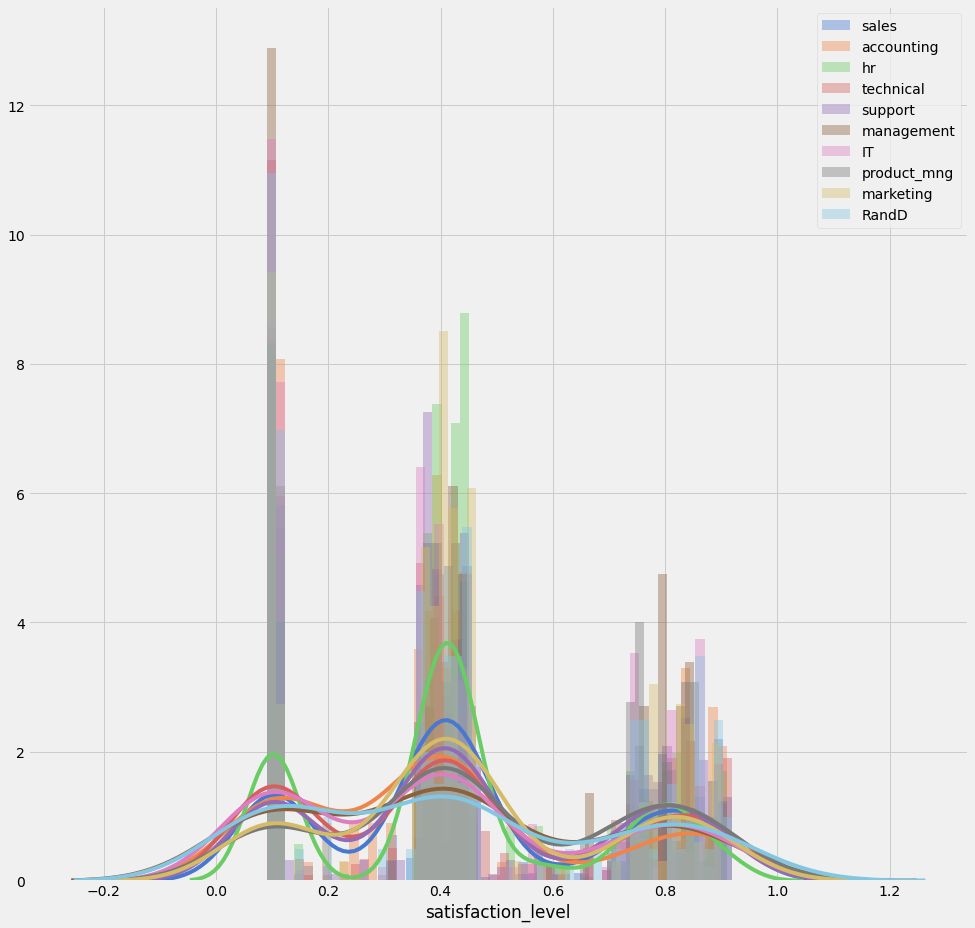

In [43]:
plt.figure(figsize=(15,15))

position_unique = df_left.position.unique()

with sns.color_palette("muted", 10):
    for i in position_unique:
        i_position = df_left[df_left.position == i]
        sns.distplot(i_position.satisfaction_level, bins=50)
        plt.legend(position_unique)


### Satisfaction Level by Number of Project in Left Group

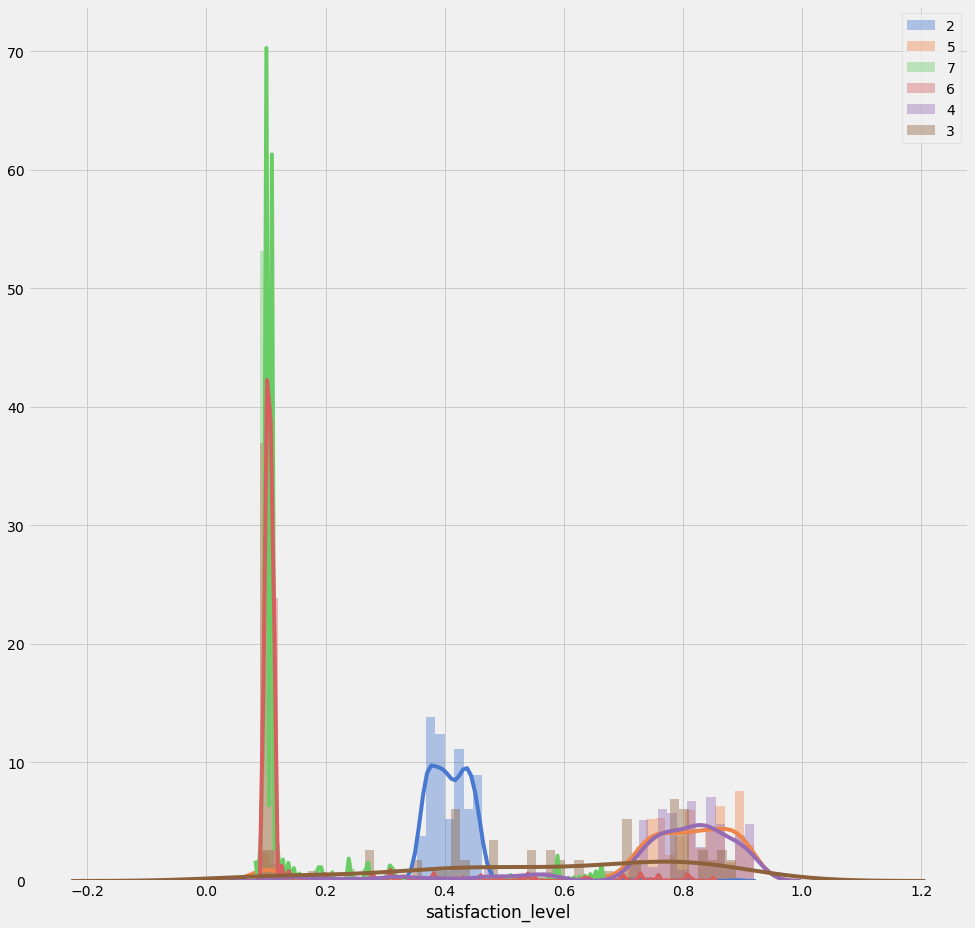

In [44]:
plt.figure(figsize=(15,15))

number_project_unique = df_left.number_project.unique()

with sns.color_palette("muted", 10):
    for i in number_project_unique:
        i_number_project = df_left[df_left.number_project == i]
        sns.distplot(i_number_project.satisfaction_level, bins=50)
        plt.legend(number_project_unique)


### Satisfaction Level by Time Spend Company in Left Group

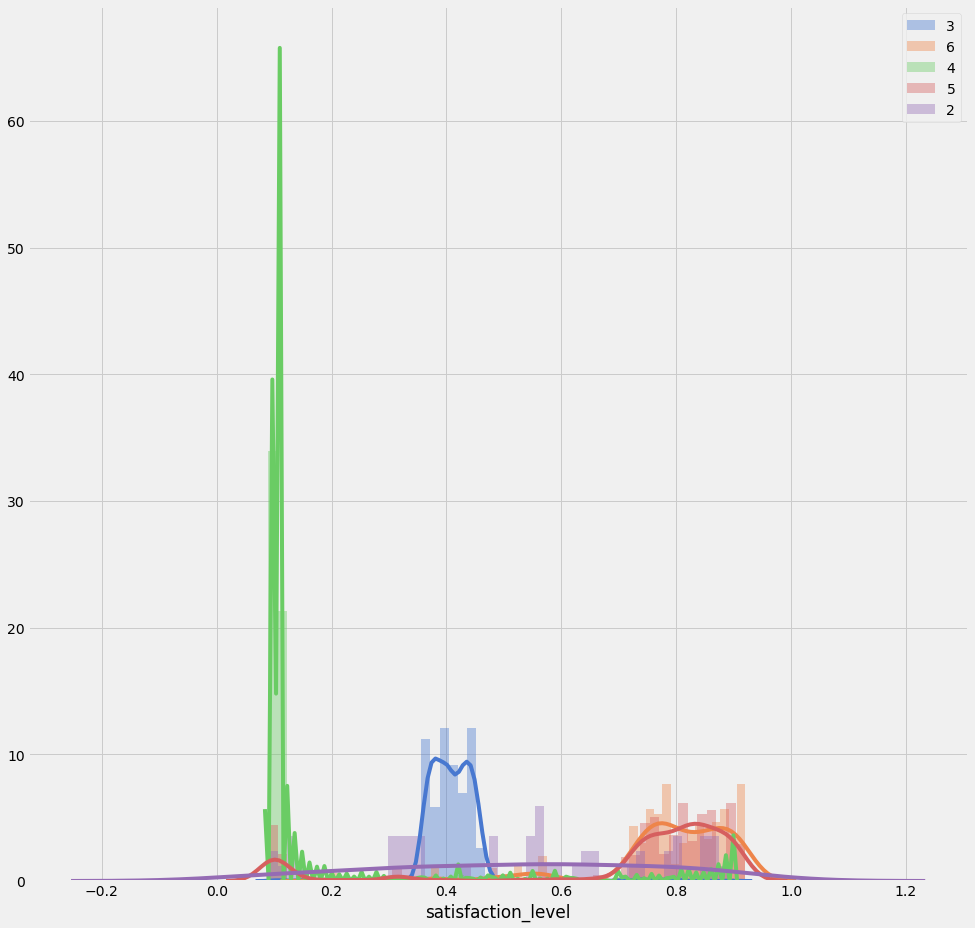

In [45]:
plt.figure(figsize=(15,15))

time_spend_company_unique = df_left.time_spend_company.unique()

with sns.color_palette("muted", 10):
    for i in time_spend_company_unique:
        i_time_spend_company = df_left[df_left.time_spend_company == i]
        sns.distplot(i_time_spend_company.satisfaction_level, bins=50)
        plt.legend(time_spend_company_unique)


### Comment: From above plot, we it can be seen that satisfaction level are highly correlated to last evaluation, number project, average monthly hours, and time spend company. Now, lets analyse it one by one.
#### 1. Satisfaction level and last evaluation show linear correlation. It means that when satisfaction level is low, last evaluation will tend to low. This is make sense, because employees who are not perform better are always not satisfied
#### 2. Satisfaction level and number project show opposite correlation. It means that higher number of project, lower satisfaction level. Sound normal?
#### 3. Satisfaction level and average monthly hours display cohesive relationship. The more they spend time in office, the less they get satisfied. This is normal too.
#### 4. Satisfaction level and time spend company display great friendship. More year that they spend in the company means they like it. So, employees who left didn't want to spend more years in what they might think as prison.

#### Based on the value, we can rank them from high to low without pay intention on the negative mark. So, this the rank:
#### Time Spend Company, Number of Project, Last Evaluation, and Average Monthly Hours
#### But, because we cannot really intervene the 'time spend company' of all employees, we can ignore it.

### Stay Group

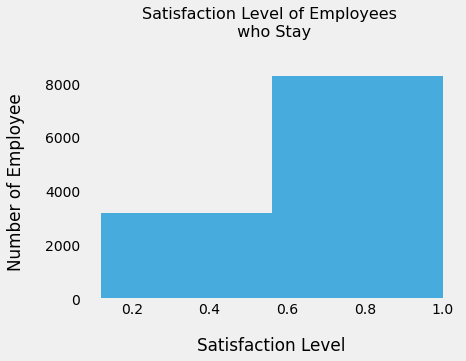

In [46]:
df_not_left['satisfaction_level'].plot.hist(alpha=0.7, bins=2)
plt.title('Satisfaction Level of Employees \n who Stay', fontsize=16, y=1.1)
plt.xlabel('Satisfaction Level', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


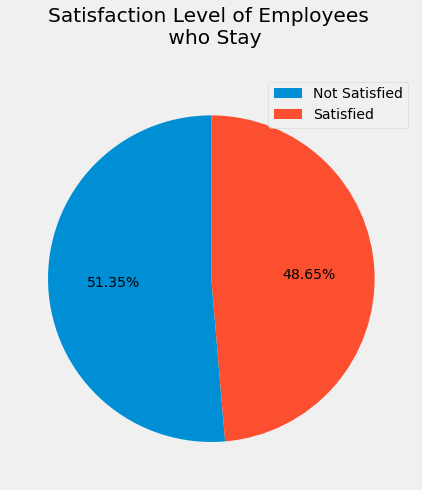

In [47]:
satisfied     = df_not_left['satisfaction_level'] >= 0.7 # If we consider 0.7 is a good satisfaction level. But off course you can change it
satisfied     = satisfied.replace({True:'Satisfied', False:'Not Satisfied'})
satisfied     = pd.DataFrame(satisfied)

value = satisfied['satisfaction_level'].value_counts().values.tolist()
label = satisfied['satisfaction_level'].value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Satisfaction Level of Employees \n who Stay', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

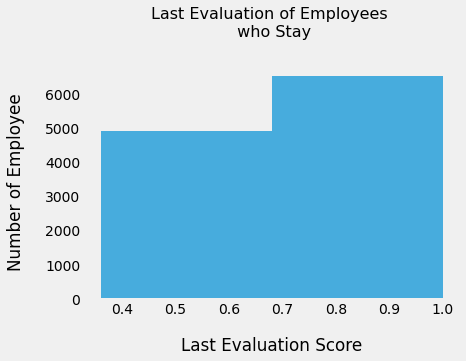

In [48]:
df_not_left['last_evaluation'].plot.hist(alpha=0.7, bins=2)
plt.title('Last Evaluation of Employees \n who Stay', fontsize=16, y=1.1)
plt.xlabel('Last Evaluation Score', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


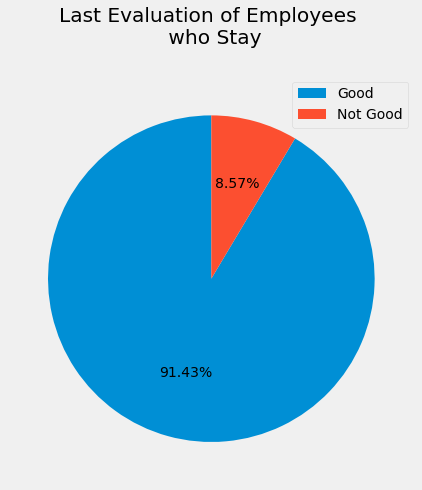

In [49]:
satisfied     = df_not_left['last_evaluation'] >= 0.5 
satisfied     = satisfied.replace({True:'Good', False:'Not Good'})
satisfied     = pd.DataFrame(satisfied)

value = satisfied['last_evaluation'].value_counts().values.tolist()
label = satisfied['last_evaluation'].value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Last Evaluation of Employees \n who Stay', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

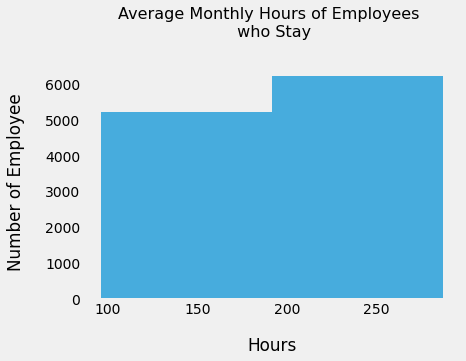

In [50]:
df_not_left['average_montly_hours'].plot.hist(alpha=0.7, bins=2)
plt.title('Average Monthly Hours of Employees \n who Stay', fontsize=16, y=1.1)
plt.xlabel('Hours', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


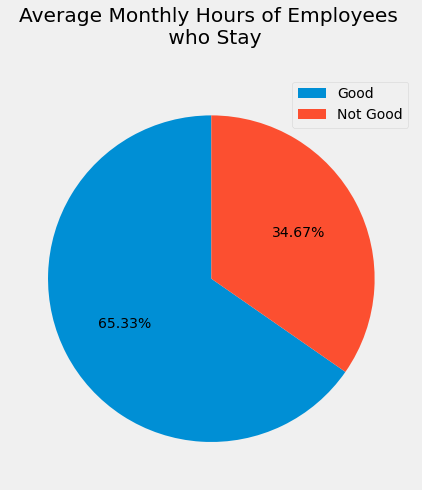

In [51]:
satisfied     = df_not_left['average_montly_hours'] >= 176
satisfied     = satisfied.replace({True:'Good', False:'Not Good'})
satisfied     = pd.DataFrame(satisfied)

value = satisfied['average_montly_hours'].value_counts().values.tolist()
label = satisfied['average_montly_hours'].value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Average Monthly Hours of Employees \n who Stay', y=1.06)
plt.legend(label, loc='upper right')
plt.show()


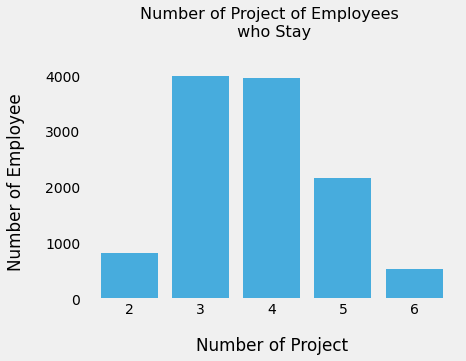

In [52]:
value_not_left = df_not_left['number_project'].value_counts().values.tolist()
label_not_left = df_not_left['number_project'].value_counts().keys().tolist()

plt.bar(label_not_left, value_not_left, alpha=0.7)
plt.title('Number of Project of Employees \n who Stay', fontsize=16, y=1.1)
plt.xlabel('Number of Project', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


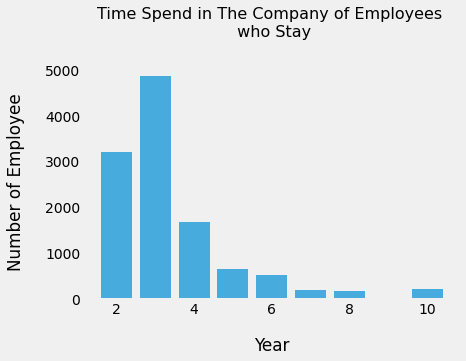

In [53]:
value_not_left = df_not_left['time_spend_company'].value_counts().values.tolist()
label_not_left = df_not_left['time_spend_company'].value_counts().keys().tolist()

plt.bar(label_not_left, value_not_left, alpha=0.7)
plt.title('Time Spend in The Company of Employees \n who Stay', fontsize=16, y=1.1)
plt.xlabel('Year', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


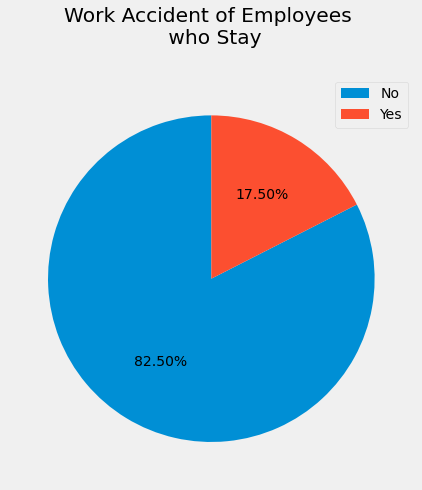

In [54]:
value = df_not_left['Work_accident'].value_counts().values.tolist()
label = df_left['Work_accident'].replace({0:'No', 1:'Yes'}).value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Work Accident of Employees \n who Stay', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

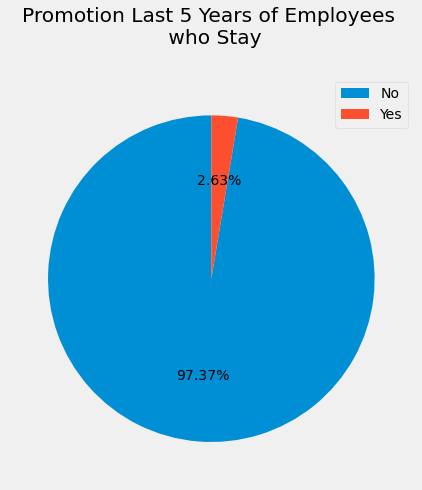

In [55]:
value = df_not_left['promotion_last_5years'].value_counts().values.tolist()
label = df_left['Work_accident'].replace({0:'No', 1:'Yes'}).value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'}, wedgeprops = {'linewidth': None})
plt.title('Promotion Last 5 Years of Employees \n who Stay', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

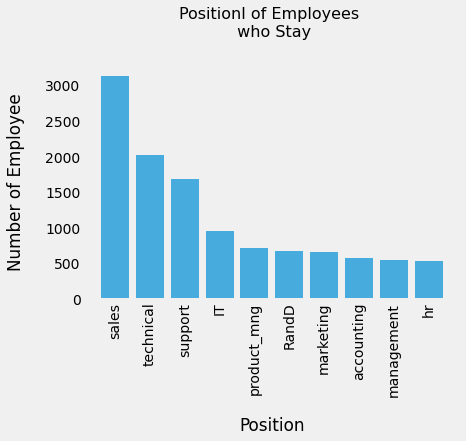

In [56]:
value_left = df_not_left['position'].value_counts().values.tolist()
label_left = df_not_left['position'].value_counts().keys().tolist()

plt.bar(label_left, value_left, alpha=0.7)
plt.title('Positionl of Employees \n who Stay', fontsize=16, y=1.1)
plt.xlabel('Position', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.xticks(rotation=90)

plt.show()

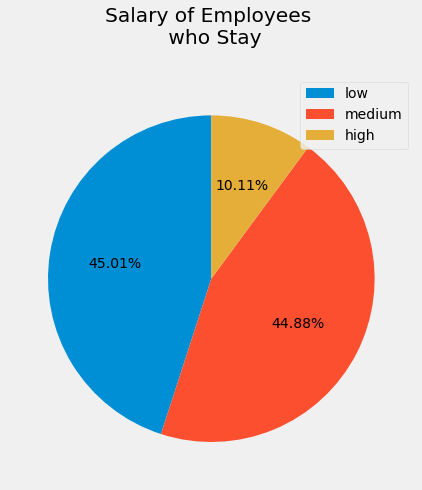

In [57]:
value = df_not_left['salary'].value_counts().values.tolist()
label = df_not_left['salary'].value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Salary of Employees \n who Stay', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

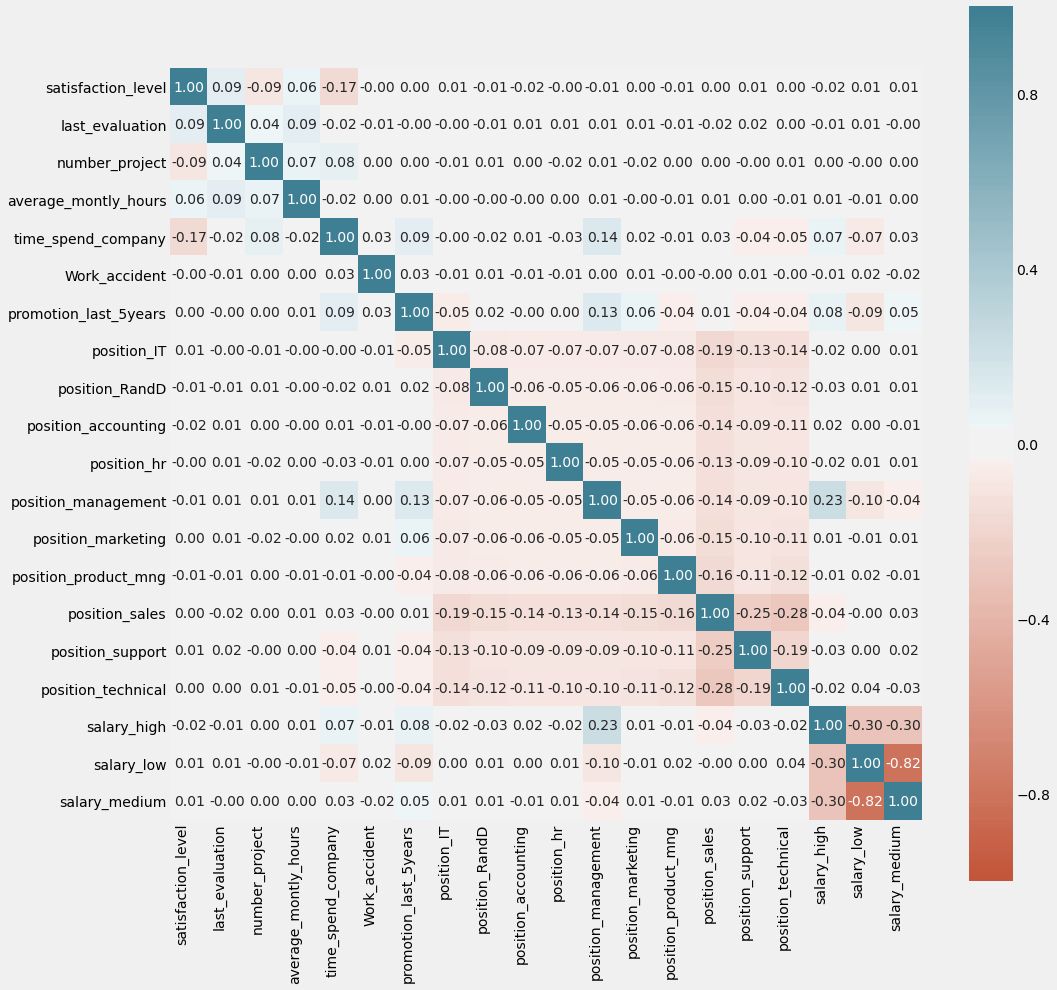

In [58]:
plt.figure(figsize=(15,15))

df_corr = pd.get_dummies(df_not_left)

corr = df_corr.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt= '.2f')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')

plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

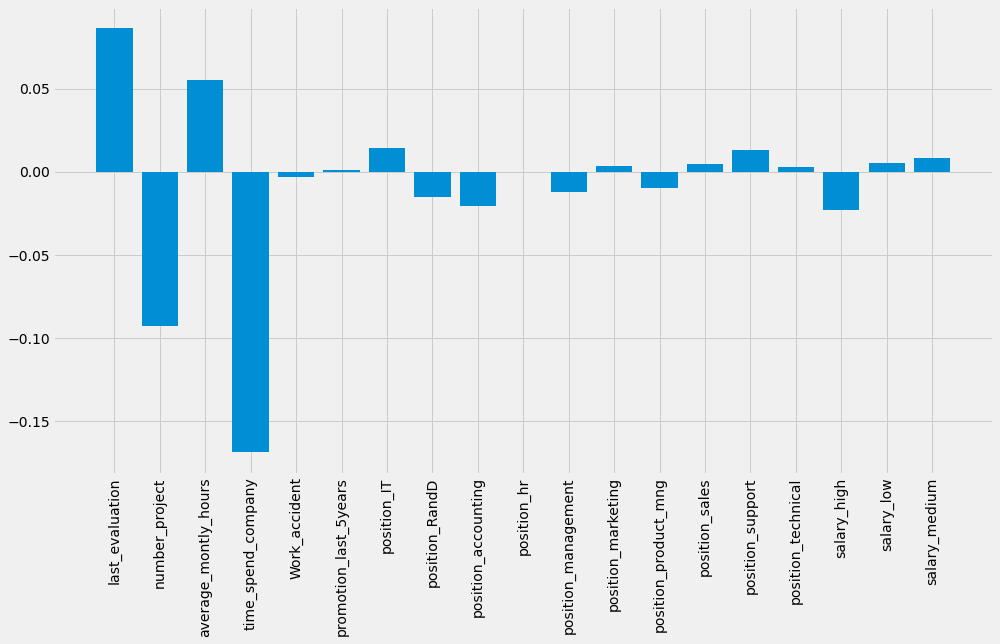

In [59]:
columns = corr.columns[1:]
corr = corr.drop(columns=columns, index=['satisfaction_level'])

plt.figure(figsize=(15,8))
plt.bar(x=corr.index, height=corr['satisfaction_level'])
plt.xticks(rotation=90)
plt.show

### Satisfaction level by salary in Stay Group

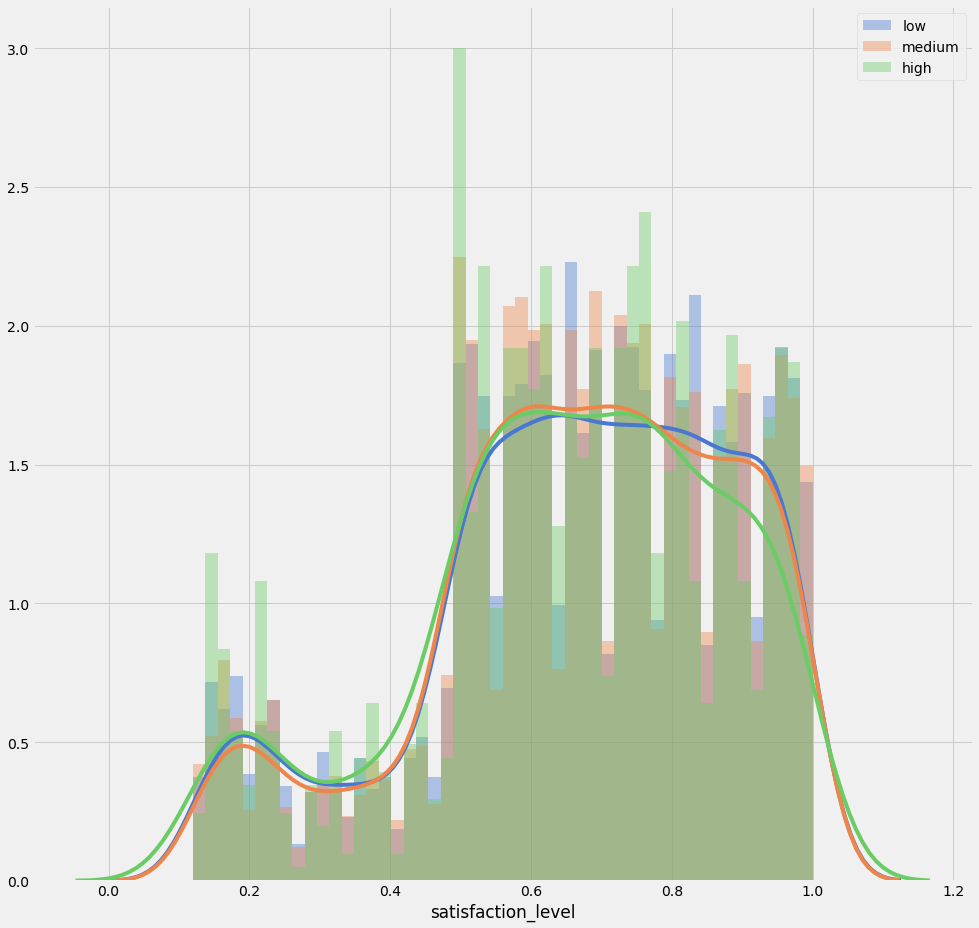

In [60]:
plt.figure(figsize=(15,15))

salary_unique = df_not_left.salary.unique()

with sns.color_palette("muted", 10):
    for i in salary_unique:
        i_salary = df_not_left[df_not_left.salary == i]
        sns.distplot(i_salary.satisfaction_level, bins=50)
        plt.legend(salary_unique)


### Satisfaction level by Position in Stay Group

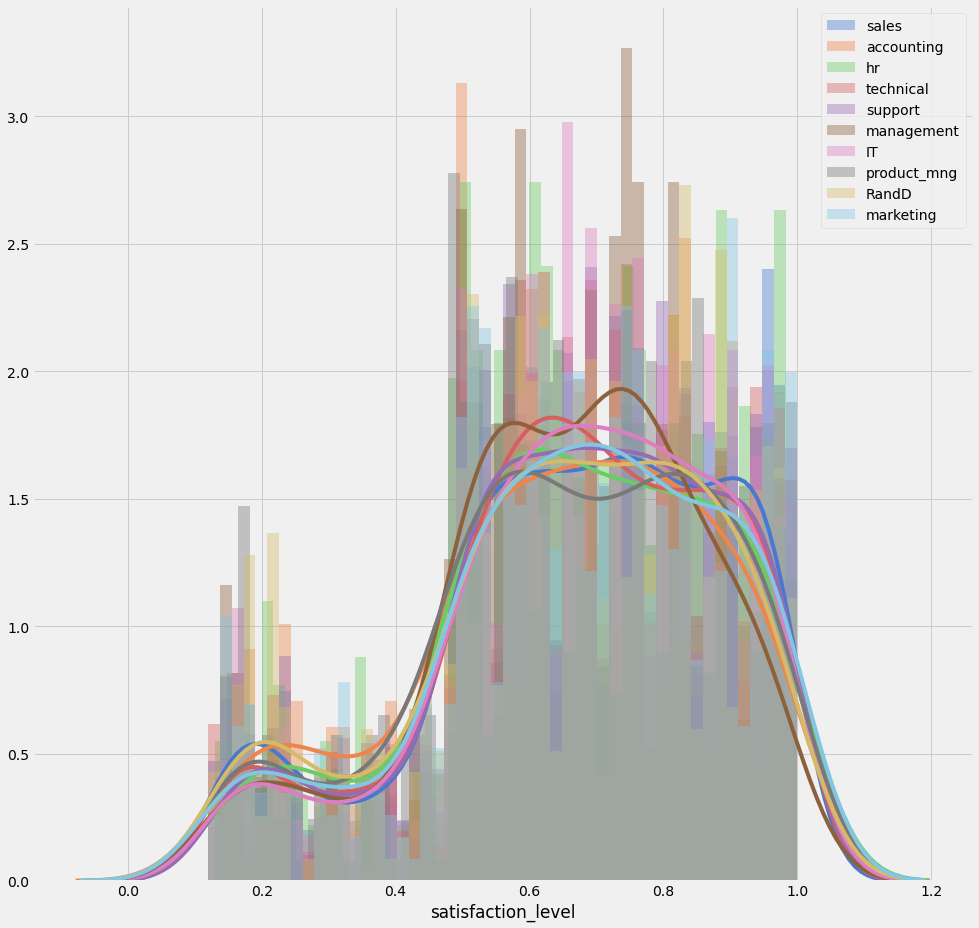

In [61]:
plt.figure(figsize=(15,15))

position_unique = df_not_left.position.unique()

with sns.color_palette("muted", 10):
    for i in position_unique:
        i_position = df_not_left[df_not_left.position == i]
        sns.distplot(i_position.satisfaction_level, bins=50)
        plt.legend(position_unique)


### Satisfaction level by Number of Project in Stay Group

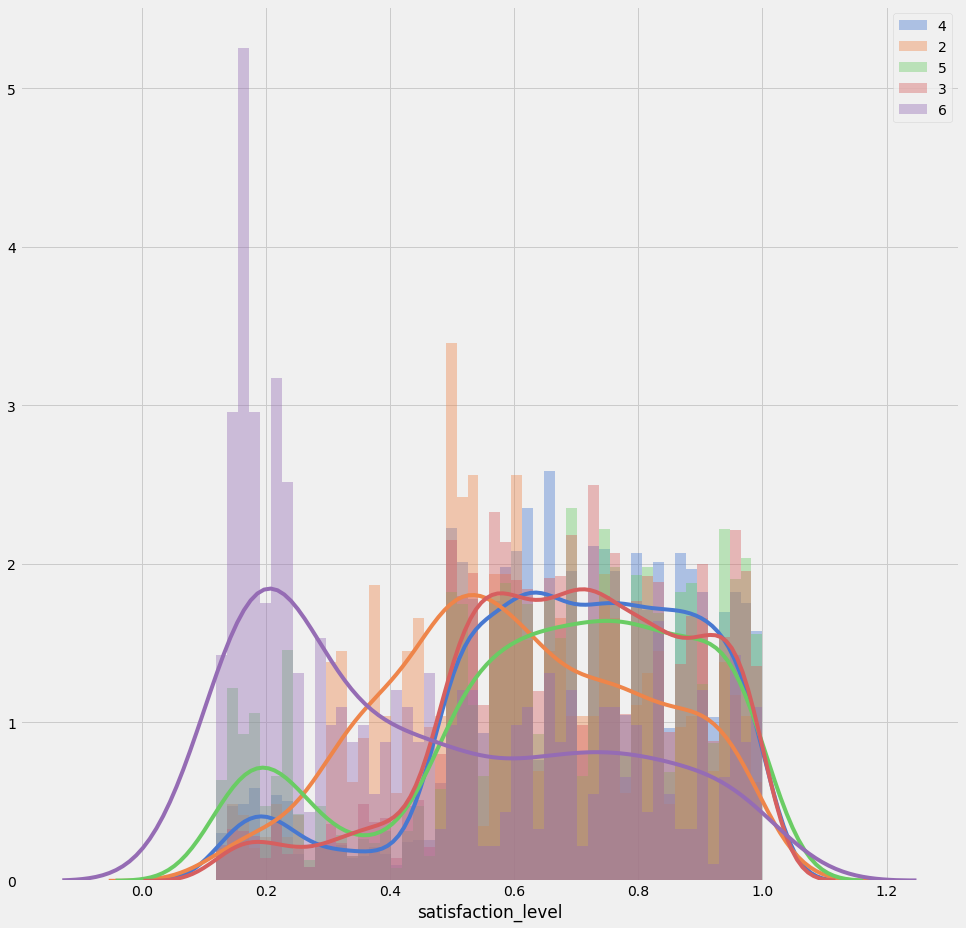

In [62]:
plt.figure(figsize=(15,15))

number_project_unique = df_not_left.number_project.unique()

with sns.color_palette("muted", 10):
    for i in number_project_unique:
        i_number_project = df_not_left[df_not_left.number_project == i]
        sns.distplot(i_number_project.satisfaction_level, bins=50)
        plt.legend(number_project_unique)


### Satisfaction level by Time Spend Company in Stay Group

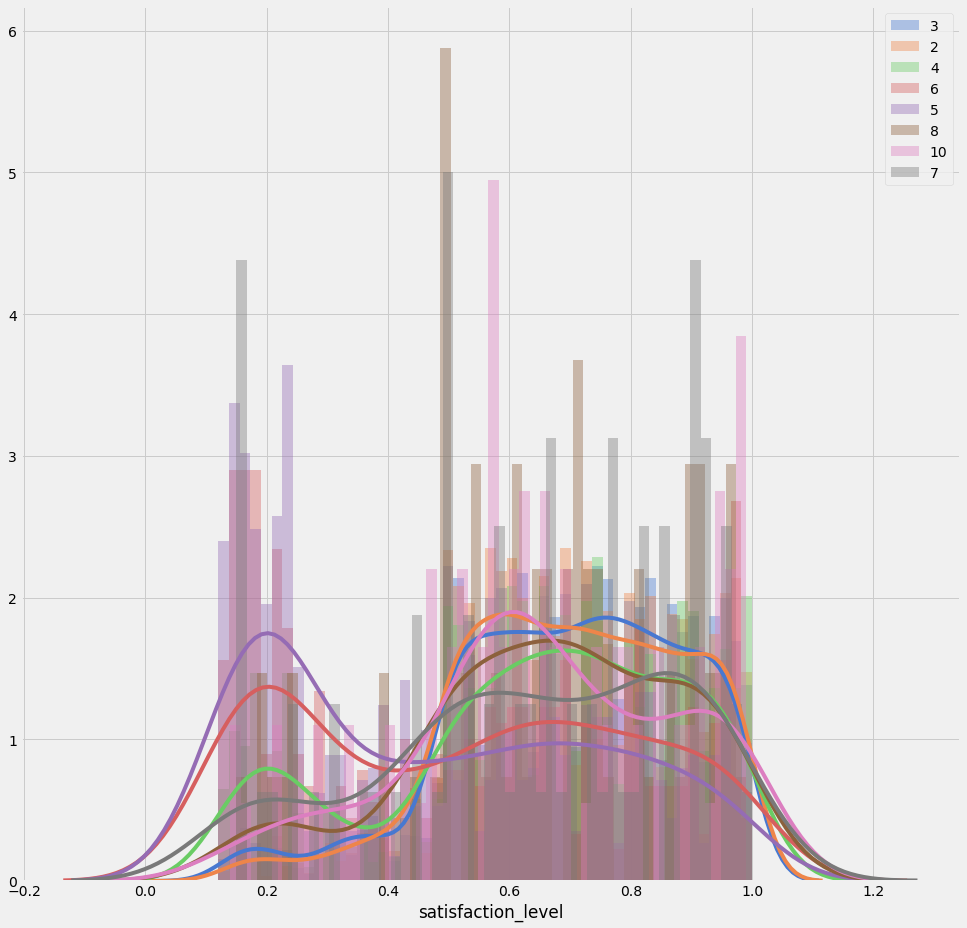

In [63]:
plt.figure(figsize=(15,15))

time_spend_company_unique = df_not_left.time_spend_company.unique()

with sns.color_palette("muted", 10):
    for i in time_spend_company_unique:
        i_time_spend_company = df_not_left[df_not_left.time_spend_company == i]
        sns.distplot(i_time_spend_company.satisfaction_level, bins=50)
        plt.legend(time_spend_company_unique)


### Lets say that we want to predict wether an employee will leave the company or not based on the obtained data. We can do that as a classification task using classification algorithm 

### Preprocessing the data first

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

encoded_columns = ['Work_accident', 'left', 'promotion_last_5years']
scaled_columns  = ['satisfaction_level', 'last_evaluation', 'average_montly_hours']

df.number_project = df.number_project.astype(str)
df.time_spend_company = df.time_spend_company.astype(str)

df = pd.get_dummies(df)

encoder = LabelEncoder()
for i in encoded_columns:
    df[i] = encoder.fit_transform(df[i])
    
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[scaled_columns])
scaled = pd.DataFrame(scaled, columns= scaled_columns)

df = df.drop(columns = scaled_columns, axis = 1)
df = df.merge(scaled, left_index= True, right_index= True, how = "left")
    
df

,Work_accident,left,promotion_last_5years,number_project_2,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,time_spend_company_10,...,position_product_mng,position_sales,position_support,position_technical,salary_high,salary_low,salary_medium,satisfaction_level,last_evaluation,average_montly_hours
0,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0.318681,0.265625,0.285047
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0.780220,0.781250,0.775701
2,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0.021978,0.812500,0.822430
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0.692308,0.796875,0.593458
4,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0.307692,0.250000,0.294393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0.340659,0.328125,0.257009
14995,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0.307692,0.187500,0.299065
14996,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0.307692,0.265625,0.219626
14997,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0.021978,0.937500,0.859813


In [65]:
features = df.drop('left', axis=1)
target = df.left

print(features.columns)

Index(['Work_accident', 'promotion_last_5years', 'number_project_2',
       'number_project_3', 'number_project_4', 'number_project_5',
       'number_project_6', 'number_project_7', 'time_spend_company_10',
       'time_spend_company_2', 'time_spend_company_3', 'time_spend_company_4',
       'time_spend_company_5', 'time_spend_company_6', 'time_spend_company_7',
       'time_spend_company_8', 'position_IT', 'position_RandD',
       'position_accounting', 'position_hr', 'position_management',
       'position_marketing', 'position_product_mng', 'position_sales',
       'position_support', 'position_technical', 'salary_high', 'salary_low',
       'salary_medium', 'satisfaction_level', 'last_evaluation',
       'average_montly_hours'],
      dtype='object')


### Splitting it into train and test category

In [66]:
from sklearn.model_selection import train_test_split

features = np.array(features)
target   = np.array(target)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123)

print(x_train.shape)
print(x_test.shape)

(11999, 32)
(3000, 32)


### And build a model

In [67]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

score = logreg.score(x_test, y_test)
score

0.8853333333333333

The score for this classifier is 0.9933333333333333


Cross Validation Result:
 [0.99133333 0.98933333 0.99333333 0.99066667 0.994      0.99133333
 0.99       0.99333333 0.98733333 0.99466311]




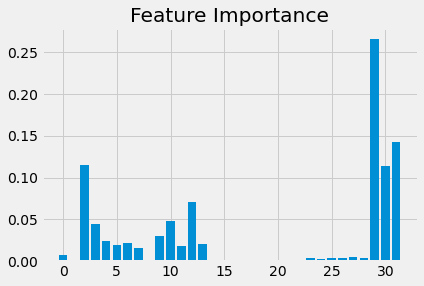

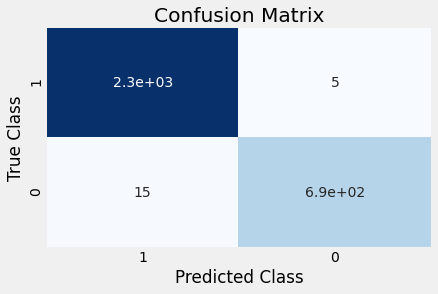

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Predict the test dataset
prediction = clf.predict(x_test)

# See the score
score = clf.score(x_test, y_test)
print('The score for this classifier is', score)
print('\n')

# Validating this classifier using k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Conduct k-fold cross-validation
cv_results = cross_val_score(clf, # Pipeline
                             features, # Feature matrix
                             target, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

print('Cross Validation Result:\n', cv_results)
print('\n')

# See feature importance of this classifier
importance = clf.feature_importances_

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance')
plt.show()
print('\n')

# Create confusion matrix
matrix = confusion_matrix(y_test, prediction)

# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=df.left.unique(), columns=df.left.unique())

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [69]:
from sklearn.svm import SVC

clf1 = SVC()
clf1.fit(x_train, y_train)

score = clf1.score(x_test, y_test)
score

0.9606666666666667

In [70]:
from sklearn.neighbors import KNeighborsClassifier

clf2 = KNeighborsClassifier()
clf2.fit(x_train, y_train)

score = clf2.score(x_test, y_test)
score

0.9403333333333334

In [71]:
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier()
clf3.fit(x_train, y_train)

score = clf3.score(x_test, y_test)
score

0.9836666666666667

In [72]:
from sklearn.naive_bayes import BernoulliNB

clf4 = BernoulliNB()
clf4.fit(x_train, y_train)

score = clf4.score(x_test, y_test)
score

0.8636666666666667